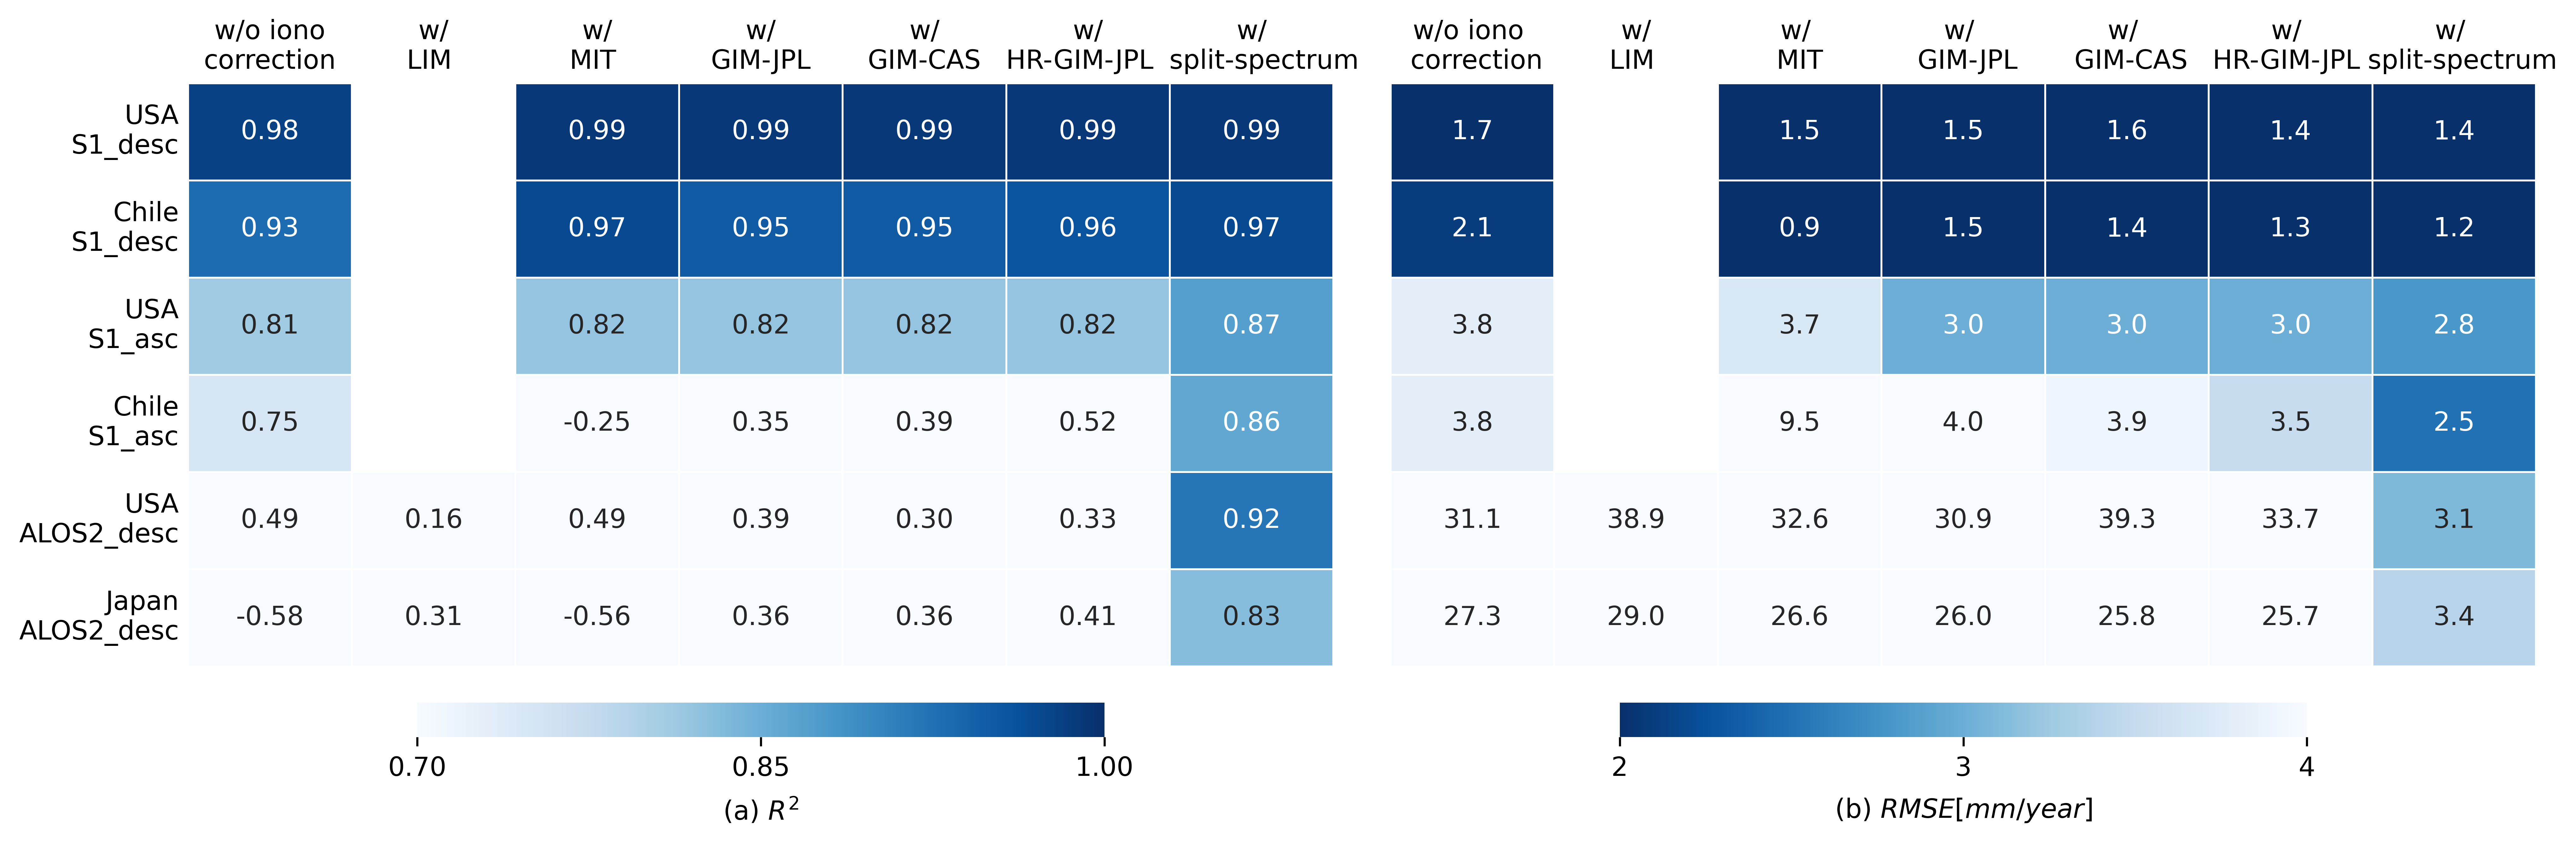

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# 创建第一个数据
data1 = {
    '': ['w/o iono\ncorrection', 'w/\nLIM ', 'w/\nMIT ', 'w/\nGIM-JPL', 'w/\nGIM-CAS', 'w/\nHR-GIM-JPL  ',  'w/\n   split-spectrum'],
    'USA\nS1_desc': [0.98, np.nan,0.99, 0.99, 0.99, 0.99, 0.99],
    'Chile\nS1_desc': [0.93, np.nan ,0.97,0.95, 0.95, 0.96,  0.97],
    'USA\nS1_asc': [0.81,np.nan,0.82, 0.82, 0.82, 0.82,  0.87],
    'Chile\nS1_asc': [0.75,np.nan,  -0.25,0.35, 0.39, 0.52, 0.86],
    'USA\nALOS2_desc': [0.49, 0.16 ,0.49, 0.39, 0.30, 0.33, 0.92],
    'Japan\nALOS2_desc': [-0.58, 0.31 ,-0.56,0.36, 0.36, 0.41,  0.83],
}

# 将第一个数据转换为DataFrame
df1 = pd.DataFrame(data1)
# 转置DataFrame，以便每个地区成为一行
df1 = df1.set_index('')

# 创建第二个数据
data2 = {
    '': ['w/o iono \n correction', 'w/\nLIM ','w/ \n MIT ', 'w/ \n GIM-JPL',  'w/ \n GIM-CAS', 'w/ \n HR-GIM-JPL  ', 'w/ \n  split-spectrum'],
    '\n': [1.7,np.nan, 1.5, 1.5, 1.6,1.4,  1.4],
    '\n\n': [2.1,np.nan,0.9,1.5, 1.4,  1.3,  1.2],
    '\n\n\n ': [3.8,  np.nan,3.7,3.0, 3.0, 3.0, 2.8],
    '\n\n\n\n ': [3.8,np.nan,9.5,  4.0, 3.9, 3.5, 2.5],
    '\n\n\n\n\n ':[31.1,38.9,32.6,30.9,39.3,33.7, 3.1],
    '\n\n\n\n\n\n ':[27.3,29.0,26.6, 26.0, 25.8,25.7, 3.4]
}

# 将第二个数据转换为DataFrame
df2 = pd.DataFrame(data2)
# 转置DataFrame，以便每个地区成为一行
df2 = df2.set_index('')

# 使用seaborn的Blues调色板创建自定义颜色映射并反转
custom_cmap = sns.color_palette("Blues", as_cmap=True).reversed()

# 创建包含两个子图的图形
fig, axes = plt.subplots(1, 2, figsize=(16, 5), dpi=600)

# 绘制第一个热图
heatmap1 = sns.heatmap(df1.T, annot=True, cmap='Blues', fmt=".2f", linewidths=.5,
                       vmin=0.7, vmax=1.0, cbar_kws={'ticks': [0.7, 0.85, 1.0],
                                 'orientation': 'horizontal',
                                 'pad': 0.05, 'shrink': 0.6}, ax=axes[0])

# 设置第一个color bar 标签
cbar1 = heatmap1.collections[0].colorbar
cbar1.set_label(r'(a) $R^2$', labelpad=6)

# 调整第一个子图的坐标轴标签位置
axes[0].xaxis.set_ticks_position('top')  # 将x轴标签放在上方
axes[0].tick_params(axis='both', which='both', length=0)

# 绘制第二个热图
heatmap2 = sns.heatmap(df2.T, annot=True, cmap=custom_cmap, fmt=".1f", linewidths=.5,
                       vmin=2, vmax=4, cbar_kws={'ticks': [2, 3, 4],
                                 'orientation': 'horizontal',
                                 'pad': 0.05, 'shrink': 0.6}, ax=axes[1])

# 设置第二个color bar 标签
cbar2 = heatmap2.collections[0].colorbar
cbar2.set_label(r'(b) $RMSE [mm/year]$', labelpad=6)

# 调整第二个子图的坐标轴标签位置
axes[1].xaxis.set_ticks_position('top')  # 将x轴标签放在上方
axes[1].tick_params(axis='both', which='both', length=0)

# 调整子图之间的间距
plt.subplots_adjust(wspace=0.05)

# 使文本居中换行
for ax in axes:
    for text in ax.texts:
        text.set_verticalalignment('center')

# 保存图形
plt.savefig('pdf/R2+RMSE.pdf', bbox_inches='tight', transparent=True, dpi=600)

# 显示图形
plt.show()

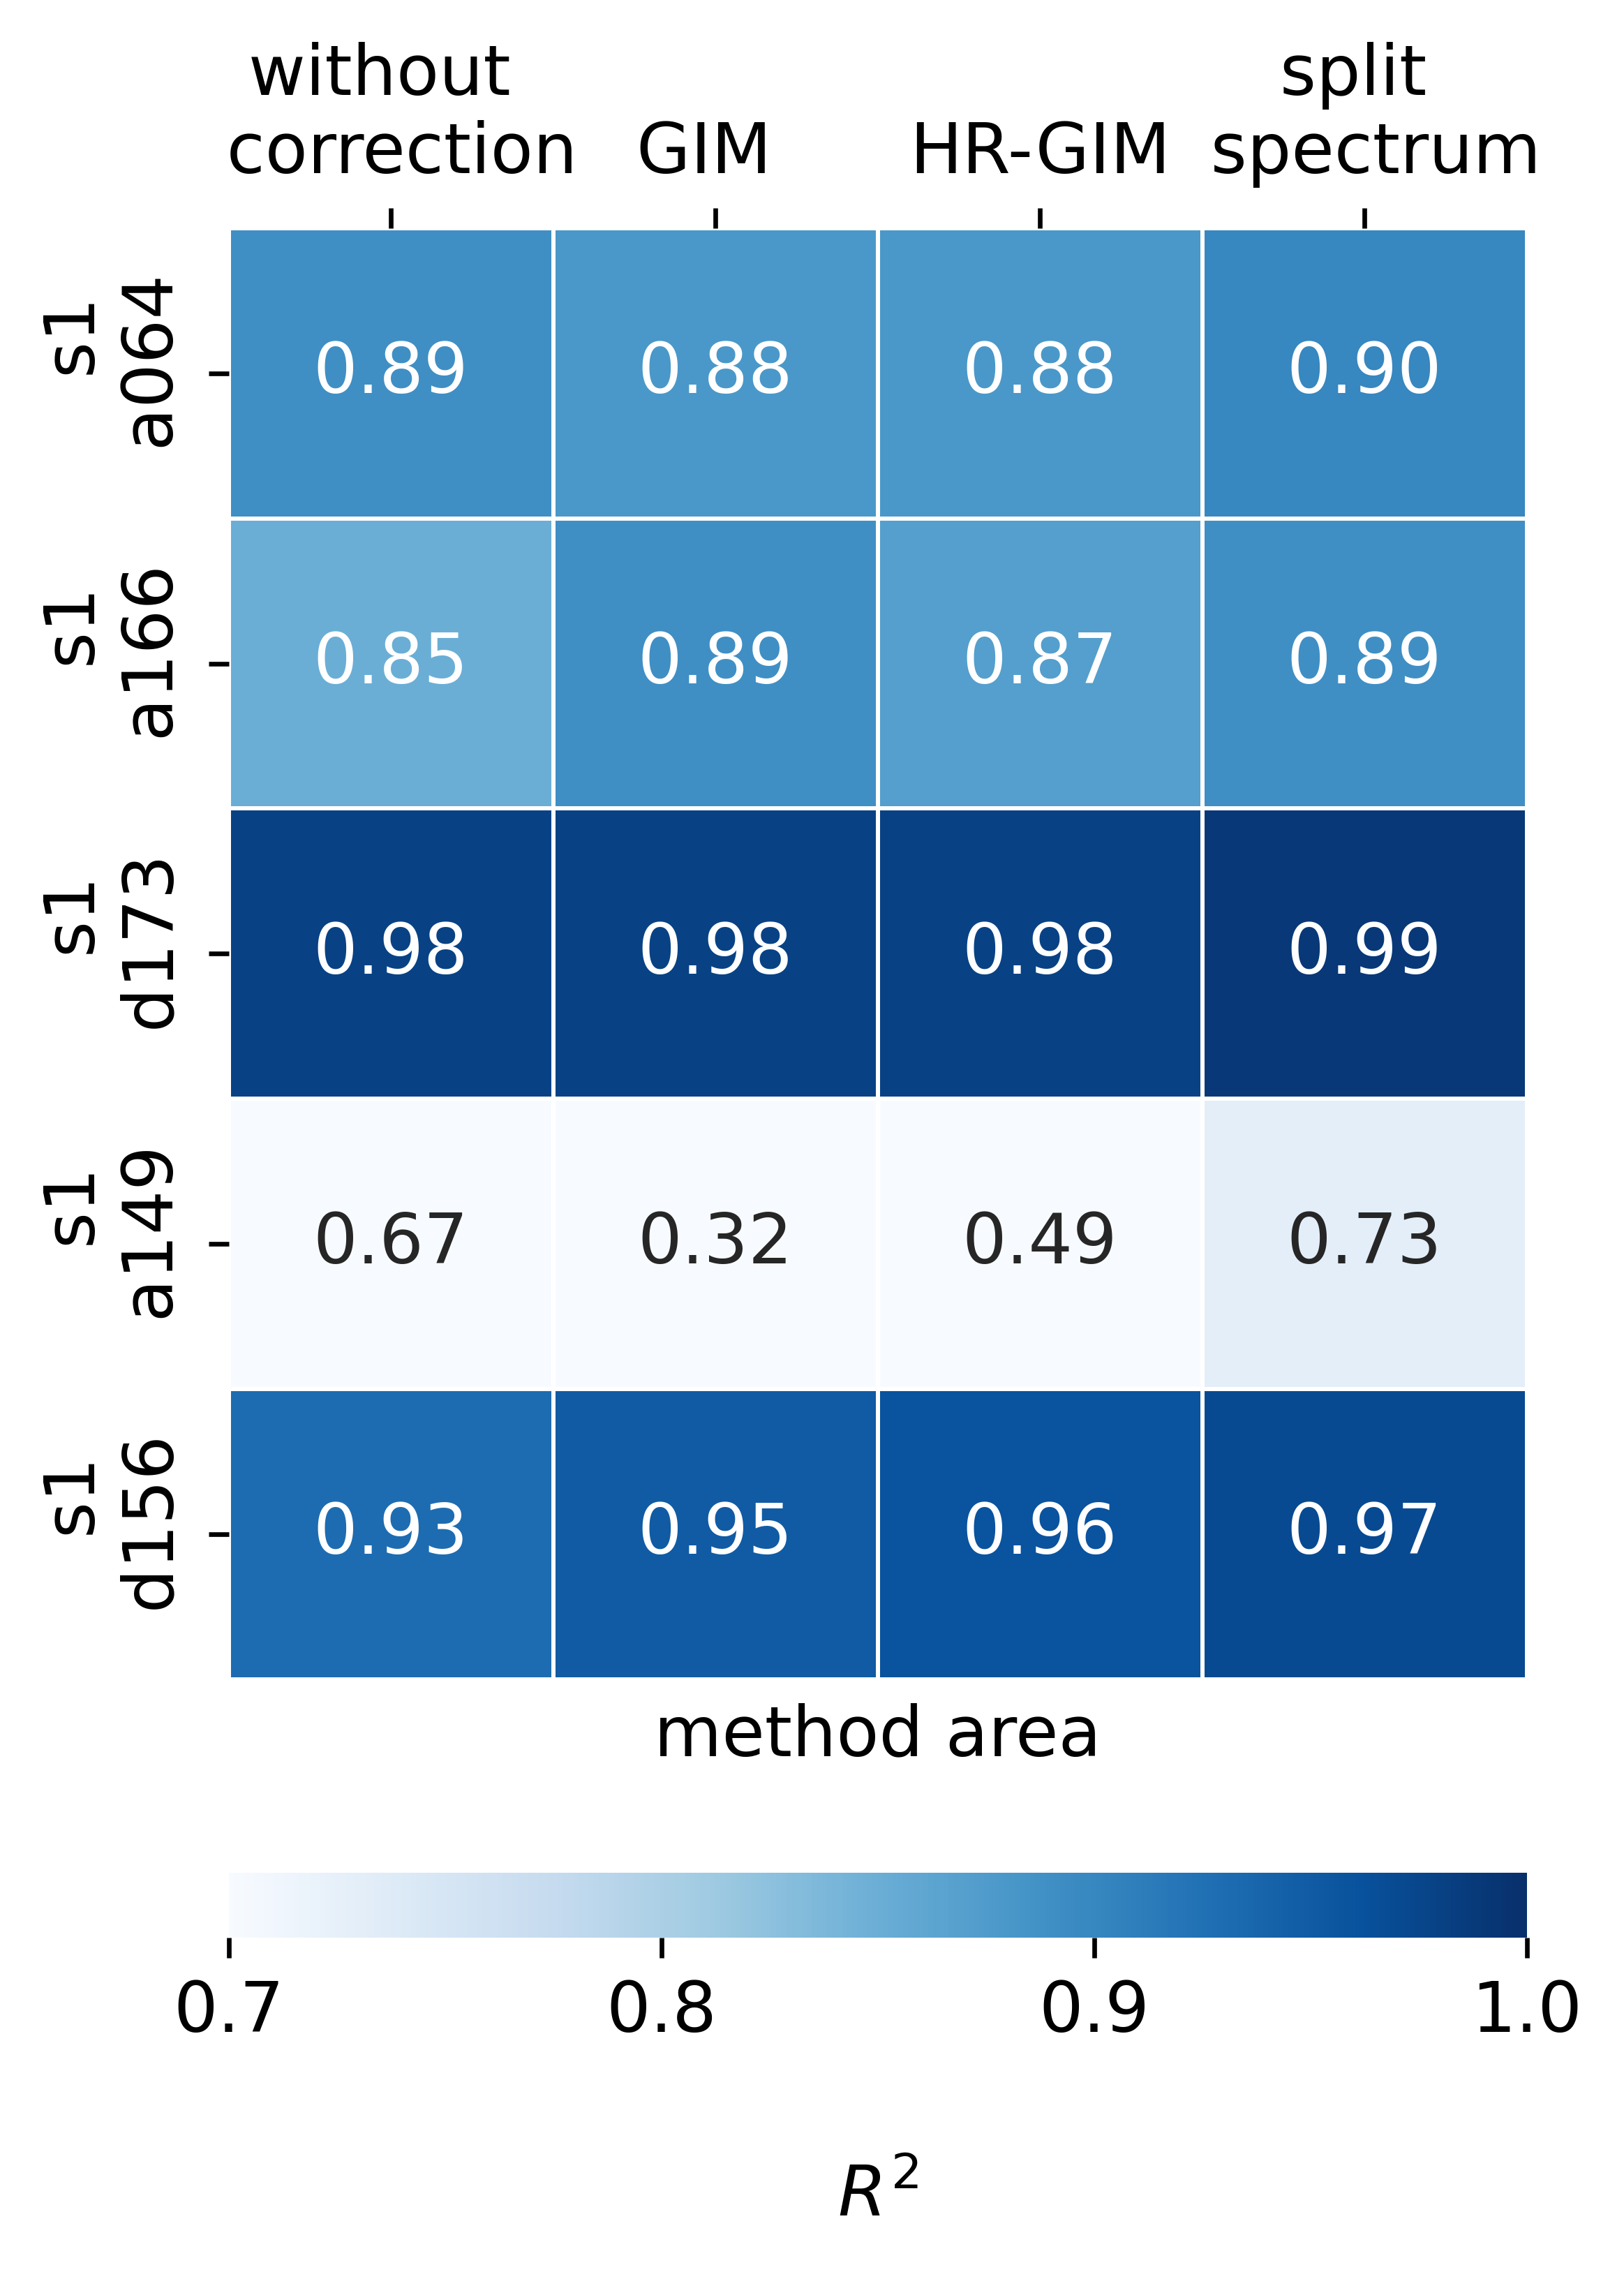

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 设置全局字体大小
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 12

# 创建数据
data = {
    'method area': ['without \n correction', 'GIM ','HR-GIM', 'split \n spectrum'],
    's1 \n a064': [0.89, 0.88, 0.88, 0.90],
    's1 \n a166': [0.85, 0.89, 0.87, 0.89],
    's1 \n d173': [0.98, 0.98, 0.98, 0.99],
    's1 \n a149': [0.67, 0.32, 0.49, 0.73],
    's1 \n d156': [0.93, 0.95, 0.96, 0.97]
}

# 将数据转换为DataFrame
df = pd.DataFrame(data)

# 转置DataFrame，以便每个地区成为一行
df = df.set_index('method area')

# 创建热图
plt.figure(dpi=600, figsize=(4, 6))

heatmap = sns.heatmap(df.T, annot=True, cmap='Blues', fmt=".2f", linewidths=.5, 
                      vmin=0.7, vmax=1.0, cbar_kws={'ticks': [0.7, 0.8, 0.9, 1.0], 
                                'orientation': 'horizontal', 
                                'pad': 0.1})

# 设置color bar 标签
cbar = heatmap.collections[0].colorbar
cbar.set_label(r'$R^2$',  labelpad=20)

# 调整坐标轴标签位置
plt.gca().xaxis.set_ticks_position('top')  # 将x轴标签放在上方
plt.savefig('pic/R2.png', bbox_inches='tight', transparent=True, dpi=600)

plt.show()

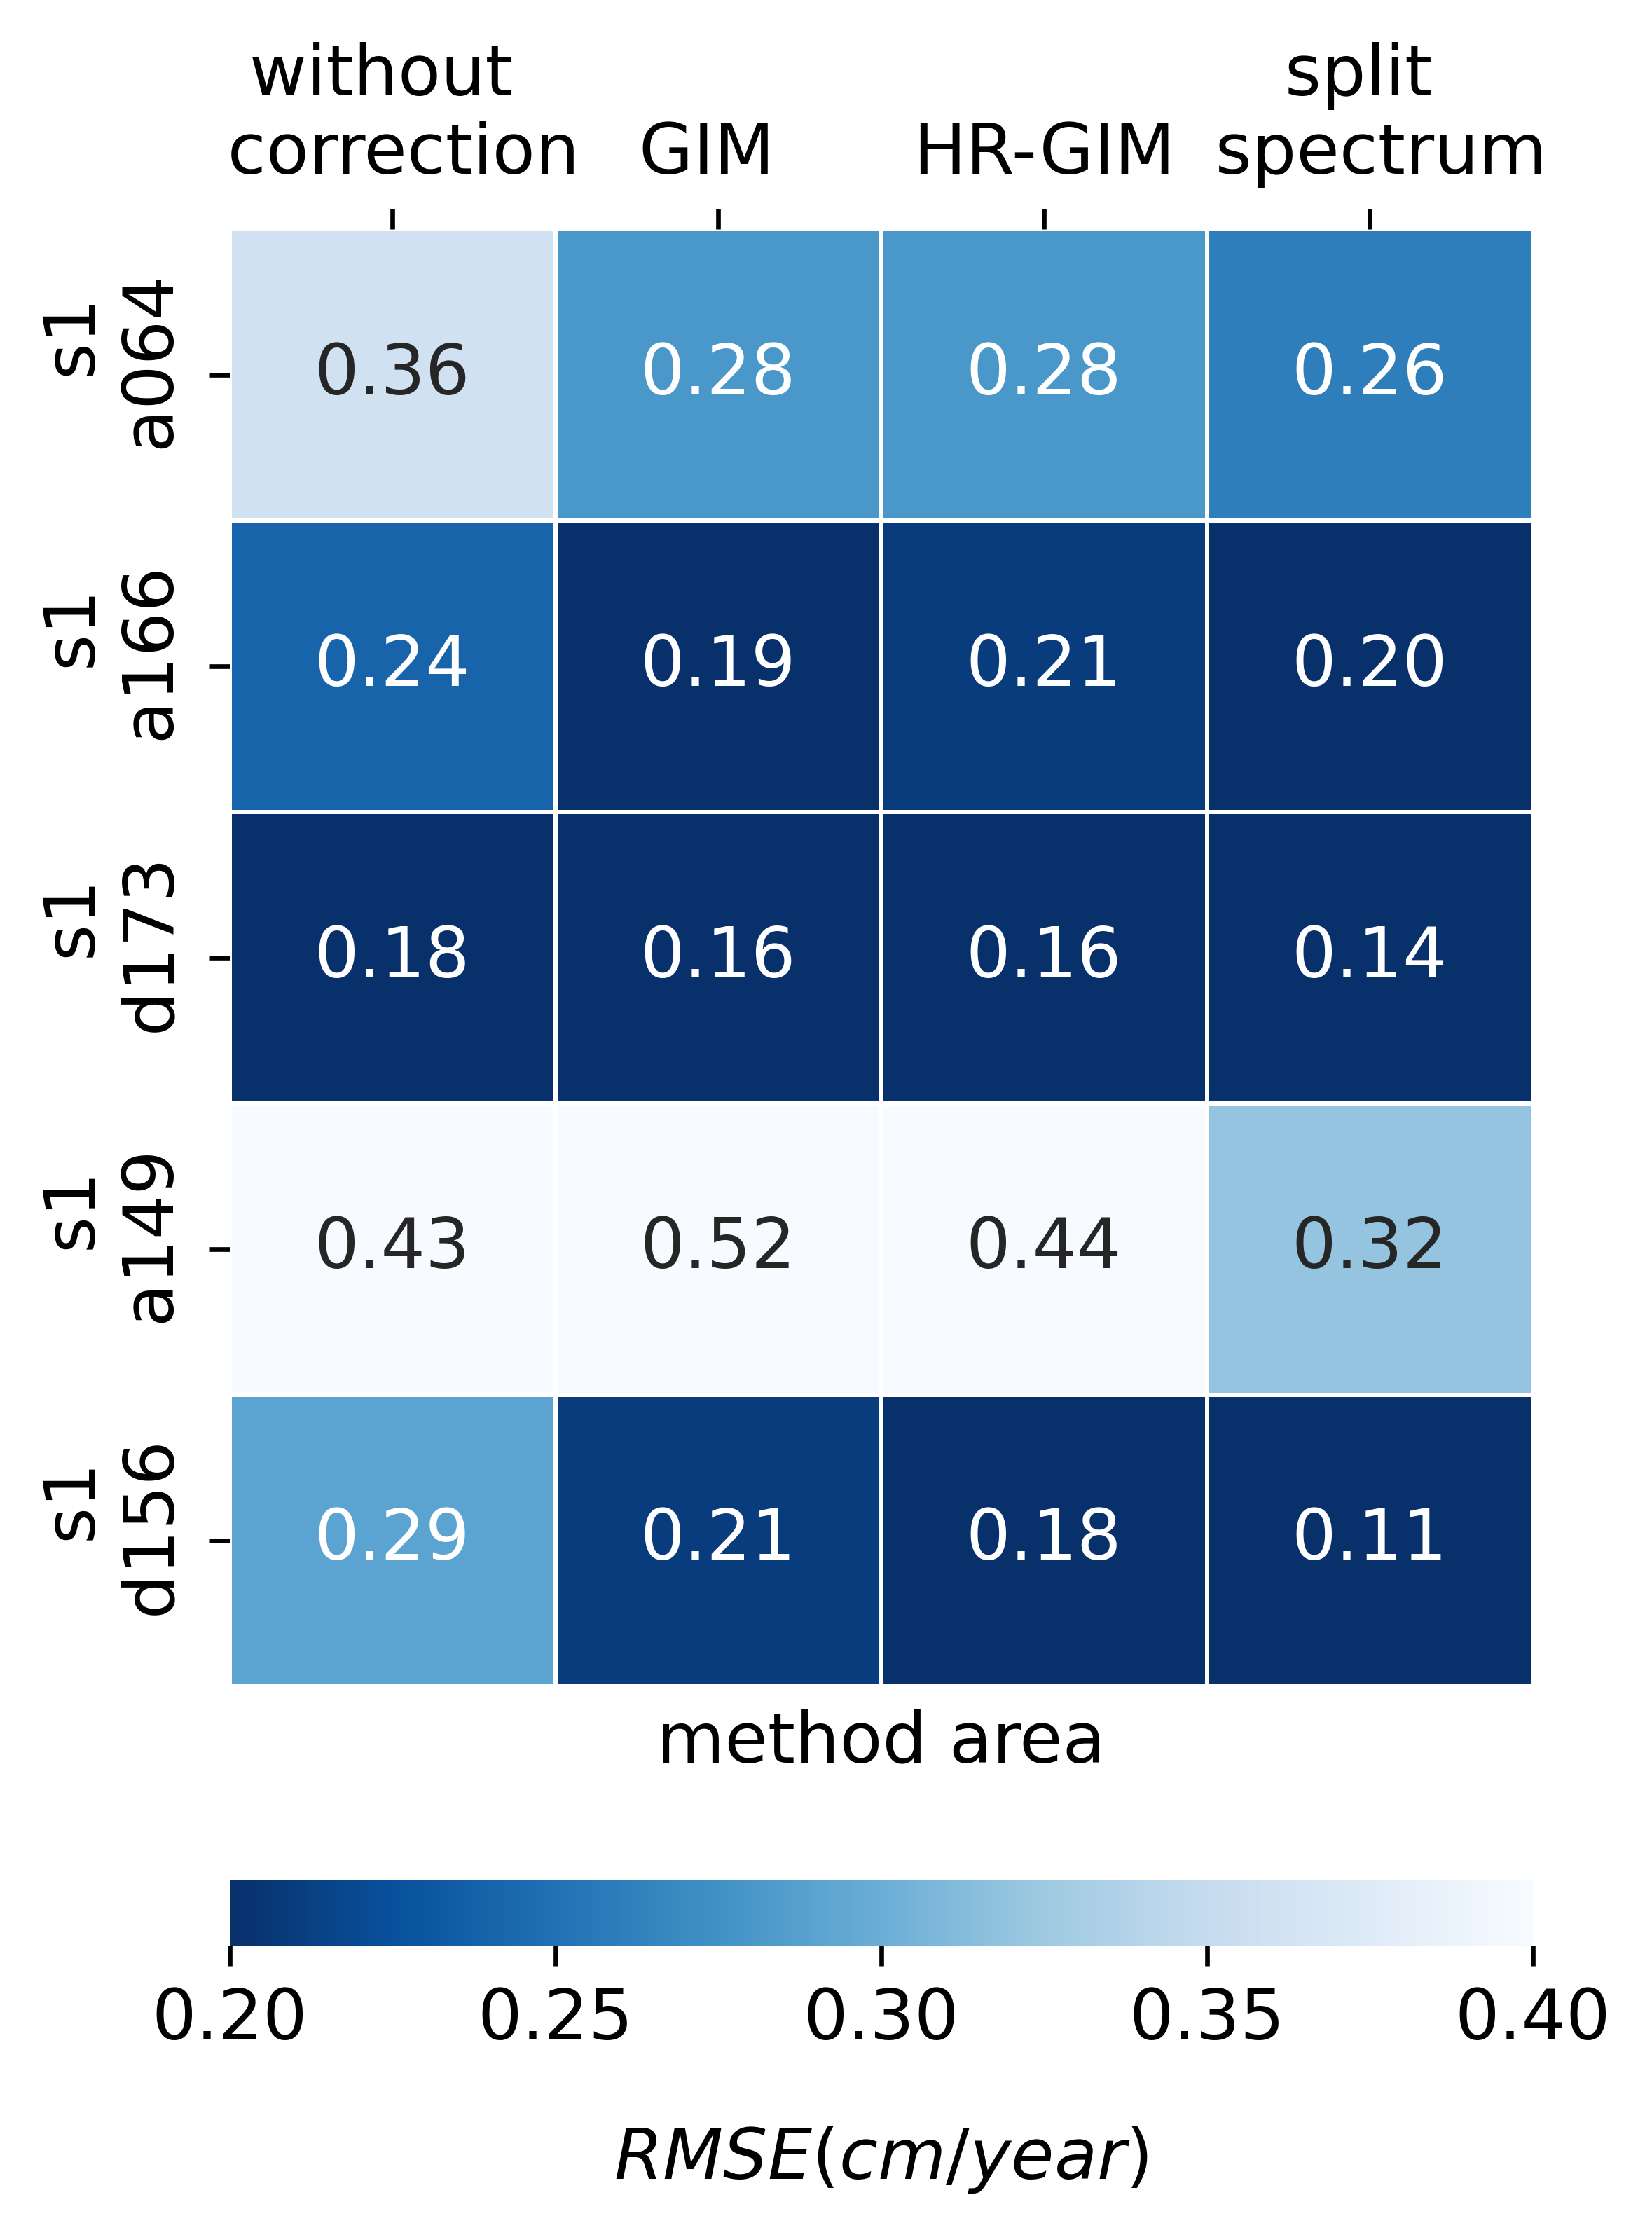

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置全局字体大小
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 12

# 创建数据
data = {
    'method area': ['without \n correction', 'GIM ','HR-GIM', 'split \n spectrum'],
    's1 \n a064': [0.36, 0.28, 0.28, 0.26],
    's1 \n a166': [0.24, 0.19, 0.21, 0.20],
    's1 \n d173': [0.18, 0.16, 0.16, 0.14],
    's1 \n a149': [0.43, 0.52, 0.44, 0.32],
    's1 \n d156': [0.29, 0.21, 0.18, 0.11]
}

# 将数据转换为DataFrame
df = pd.DataFrame(data)

# 转置DataFrame，以便每个地区成为一行
df = df.set_index('method area')

# 使用seaborn的Blues调色板创建自定义颜色映射并反转
custom_cmap = sns.color_palette("Blues", as_cmap=True).reversed()

# 创建热图
plt.figure(dpi=600, figsize=(4, 6))

heatmap = sns.heatmap(df.T, annot=True, cmap=custom_cmap, fmt=".2f", linewidths=.5, 
                      vmin=0.2, vmax=0.4, cbar_kws={'ticks': [0.2, 0.25, 0.3, 0.35, 0.4], 
                                'orientation': 'horizontal', 
                                'pad': 0.1})

# 设置color bar 标签
cbar = heatmap.collections[0].colorbar
cbar.set_label(r'$RMSE (cm/year)$',  labelpad=12)

# 调整坐标轴标签位置
plt.gca().xaxis.set_ticks_position('top')  # 将x轴标签放在上方

plt.savefig('pic/RMSE.png', bbox_inches='tight', transparent=True, dpi=600)

plt.show()

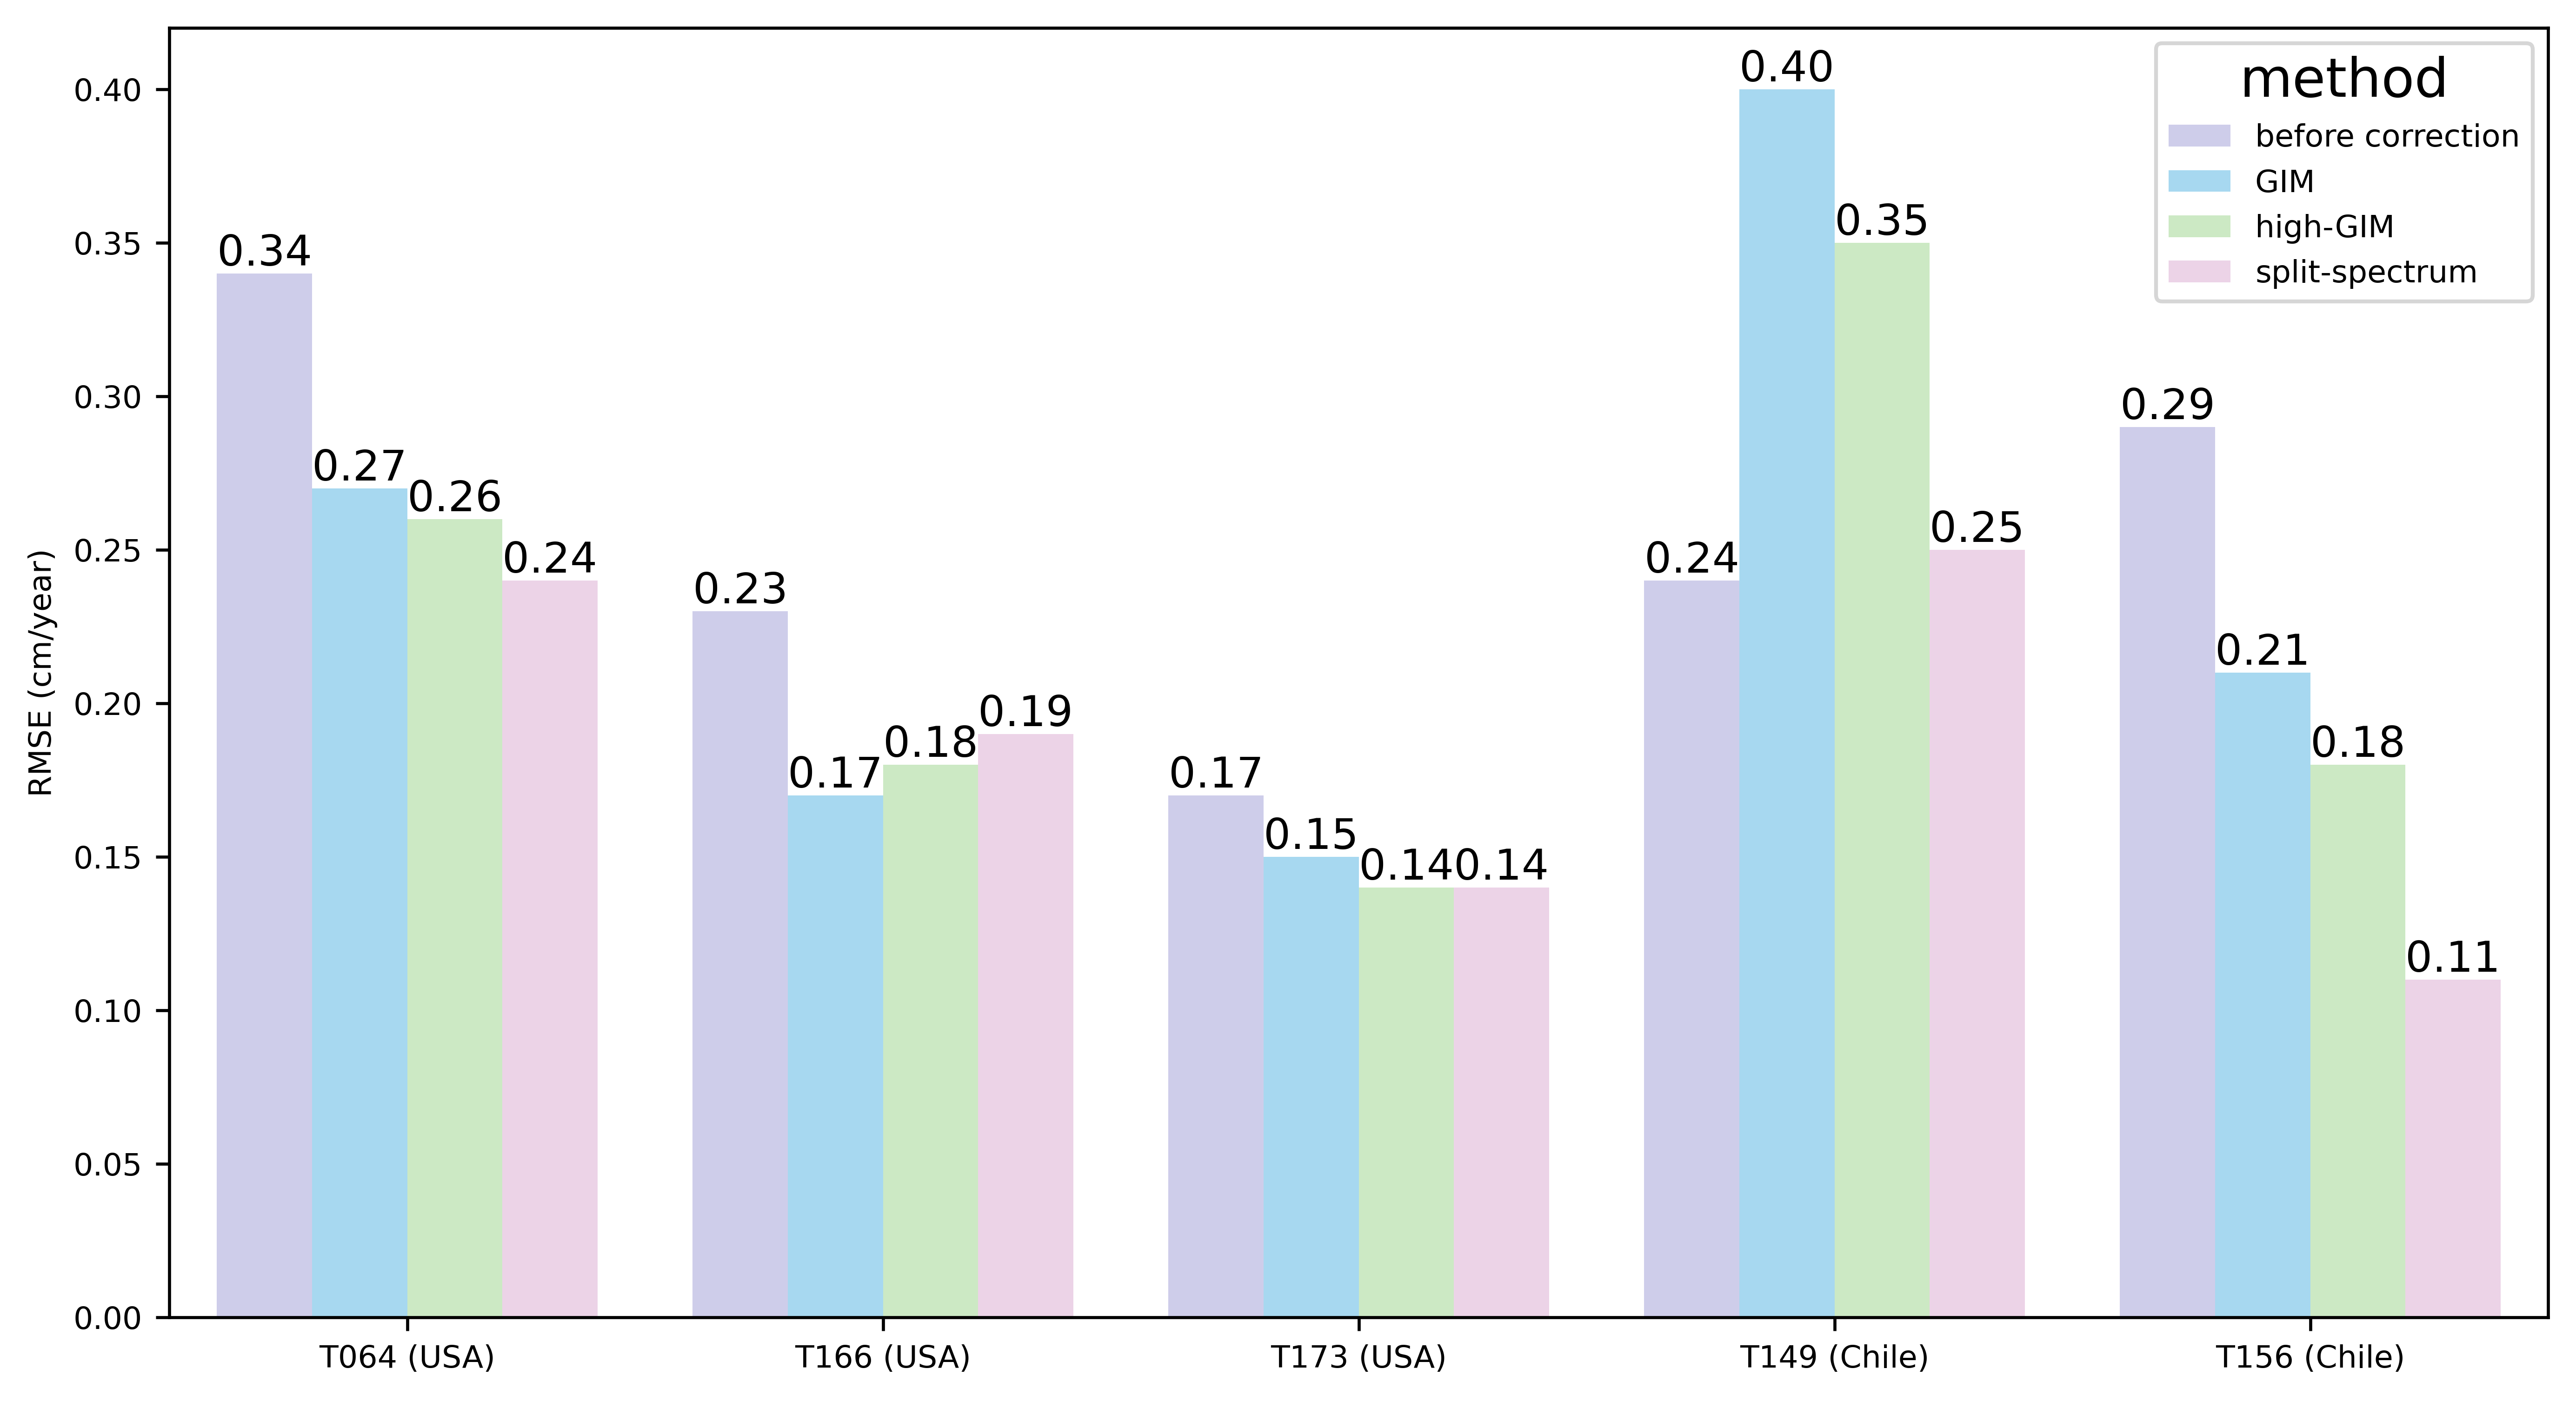

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 14})
# 创建数据
data = {
   'method': ['before correction', 'GIM ', 'high-GIM','split-spectrum'],
   'T064 (USA)': [0.34, 0.27, 0.26, 0.24],
   'T166 (USA)': [0.23, 0.17, 0.18, 0.19],
   'T173 (USA)': [0.17, 0.15, 0.14, 0.14],
   'T149 (Chile)': [0.24, 0.40, 0.35, 0.25],
   'T156 (Chile)': [0.29, 0.21, 0.18, 0.11]
}

# 将数据转换为DataFrame
df = pd.DataFrame(data)

# 长格式数据转换，以便绘制柱状图
df_melt = pd.melt(df, id_vars='method', var_name='region', value_name='RMSE (cm/year)')

# 按照颜色对应关系设置颜色
custom_palette = ["#CAC8EF", "#9BDCFC", "#C9EFBE", "#F0CFEA"]
sns.set_palette(custom_palette)

# 创建柱状图，调整图像大小
plt.figure(dpi = 600, figsize=(11, 6))
ax = sns.barplot(x='region', y='RMSE (cm/year)', hue='method', data=df_melt)

# 设置绘图风格，不显示网格线
ax.grid(False)

for p in ax.patches[0:20]:
    height = p.get_height()
    ax.annotate('{:.2f}'.format(height), (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# 设置轴标签和标题
plt.xlabel('')
plt.ylabel(r'RMSE (cm/year)')
plt.title('')

# 保存图片为PDF
plt.savefig('pdf/RMSE.pdf', bbox_inches='tight', transparent=True, dpi=600)
# 显示图形
plt.show()